# CO2 Emissions in the USA

# Install important packages if these are not installed

In [2]:
#pip install plotly==4.11.0

In [3]:
#pip install "notebook>=5.3" "ipywidgets>=7.2"

In [4]:
#pip install plotly

In [5]:
#pip install chart_studio

In [6]:
#pip install cufflinks

## Offline Plotly Usage

Imports packages and set everything up to be working offline with the plotly.

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [9]:
init_notebook_mode(connected=True) 

In [10]:
cf.go_offline()

#Important resources to make the use of Offline plotly and the Choropleth US Maps


Offline Plotly Usage Reference [Click here](https://plot.ly/python/offline/).

Choropleth US Maps [Click here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).


In [11]:
df = pd.read_excel('State by State CO2 Emissions Data.xlsx')
df.head()

,State Name,Abreviation,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ALABAMA,AL,139.326113,141.857207,143.367689,145.809061,147.427980,139.803869,119.883963,132.411867,129.385770,122.846613,120.163492,122.524344,119.424815,114.258181,108.329726
1,ALASKA,AK,43.434377,46.618954,47.911235,45.691982,43.988392,39.474664,37.745276,38.638614,38.458899,37.979868,35.805625,35.012089,35.891200,34.553551,34.078722
2,ARIZONA,AZ,139.326113,141.857207,143.367689,145.809061,147.427980,139.803869,119.883963,132.411867,129.385770,122.846613,120.163492,122.524344,119.424815,114.258181,108.329726
3,ARKANSAS,AR,61.838159,62.329779,59.967538,61.864292,63.192890,64.122716,61.297248,65.569366,66.947938,65.836847,68.031740,68.673995,58.886214,61.986410,63.871495
4,CALIFORNIA,CA,366.346961,384.857612,381.549165,390.411896,395.301584,379.853875,365.768498,360.107110,345.723642,350.945475,352.548454,349.888086,357.530710,357.339977,358.632813


In [12]:
df.columns

Index(['State Name ', 'Abreviation',          2003,          2004,
                2005,          2006,          2007,          2008,
                2009,          2010,          2011,          2012,
                2013,          2014,          2015,          2016,
                2017],
      dtype='object')

In [13]:
#df.rename(columns = {'State Name ':'STATE'}, inplace = True) 

#Displaying Figures Using The renderers Framework

The renderers framework is a flexible approach for displaying plotly.py figures in a variety of contexts. To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. With either approach, plotly.py will display the figure using the current default renderer(s).


Renderers configuration
-----------------------
    Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']


For more infomation check the below link:

https://plotly.com/python/renderers/


In [56]:
import plotly.io as pio
pio.renderers.default = "colab" # interactive plots on google colab

In [58]:
#Example
fig = go.Figure(
    data=[go.Bar(x=df['Abreviation'] , y=df[2017])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

#Install orca on Google Colab

!pip install plotly>=4.7.1

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca

!chmod +x /usr/local/bin/orca

!apt-get install xvfb libgtk2.0-0 libgconf-2-4



In [49]:
#!pip install plotly>=4.7.1

As interactive plots cann't be displayed on the github,
so in order to display the static images there, install the orca and set render to svg

In [54]:
pio.renderers.default = "svg" 

If working on local system, use "notebook_connected" as a default render

In [59]:
#Example
fig = go.Figure(
    data=[go.Bar(x=df['Abreviation'] , y=df[2017])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

In order to show the choropleth USA Maps, firstly set the two dictionaries

1. data 
2. layout


In [50]:
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = df['Abreviation'],
            z = df[2017],
            locationmode = 'USA-states',
            text = df['State Name '],
            marker = dict(line = dict(color = 'rgb(245, 66, 188)',width = 2)),
            colorbar = {'title':"CO2 Emission"}
            ) 

In [51]:
layout = dict(title = '2017 CO2 Emission by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [52]:
choromap = go.Figure(data = [data],layout = layout)

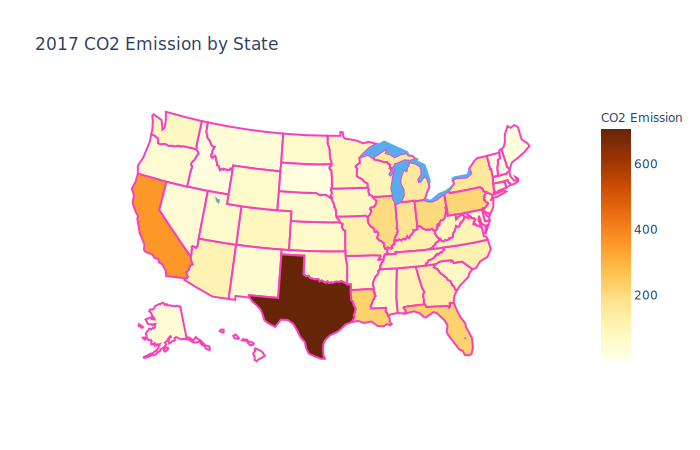

In [53]:
choromap.show()
#iplot(choromap)